![Project 2.jpg](https://storage.googleapis.com/kaggle-datasets-images/1149752/1927562/5791fbd3e776c6faf46b6dff93797021/dataset-cover.jpg?t=2021-02-10-07-39-22)

# House Rent Prediction - Supervised Machine Learning: Regression

## About Dataset
This data is mainly original from Kaggle: [House Rent Prediction Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset) 

<h1 style="padding:8px;background-color:#234bcf;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">Content</h1>
<br>
<p>In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.</p>

<h1 style="padding:8px;background-color:#234bcf;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">Dataset Glossary (Column-Wise)</h1>

- **BHK:** Number of Bedrooms, Hall, Kitchen.
- **Rent:** Price of the Houses/Apartments/Flats.
- **Size:** Size of the Houses/Apartments/Flats in Square Feet.
- **Floor:** Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
- **Area Type:** Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
- **Area Locality:** Locality of the Houses/Apartments/Flats.
- **City:** City where the Houses/Apartments/Flats are Located.
- **Furnishing Status:** Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
- **Tenant Preferred:** Type of Tenant Preferred by the Owner or Agent.
- **Bathroom:** Number of Bathrooms.
- **Point of Contact:** Whom should you contact for more information regarding the Houses/Apartments/Flats.

<h1 style="padding:8px;background-color:#234bcf;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">Importing Libraries</h1>

In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

<h1 style="padding:8px;background-color:#234bcf;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">Loading Data</h1>

In [3]:
rent_data = pd.read_csv('/content/House_Rent_Dataset.csv')
rent_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


There are 4 continous columns which are int64, 8 categorical columns.

In [5]:
rent_data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

#### Observations:
- There is no null value for any column in the dataset.

<div class="alert alert-block alert-info"> 📌 Handle Floor data.</div>

In Given Dataset we have a column "Floor", Let's Divide this column in 2 parts, 1 will say about Floor Number and another will tell about total number of floor

In [6]:
rent_data["Floor_Number"]= rent_data["Floor"].apply(lambda x:str(x).split()[0])

In [7]:
rent_data["Total_Number_of_Floor"] = rent_data["Floor"].apply(lambda x:str(x).split()[-1])

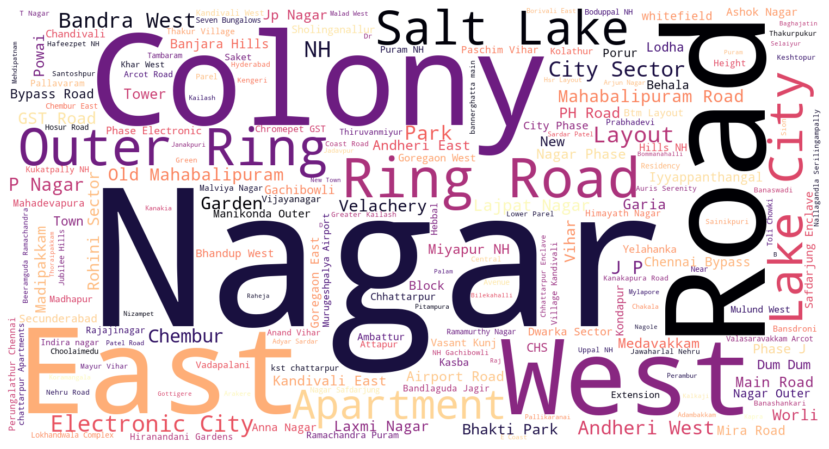

In [8]:
text = " ".join(area for area in rent_data["Area Locality"])
wordcloud = WordCloud(background_color="white", 
                      max_words=200,
                      width=1500, 
                      height=800,
                      colormap="magma" ).generate(text)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
##Dropping unnecesaary columns from dataset
rent_data = rent_data.drop(['Posted On', 'Area Locality', 'Floor'],axis=1)

In [10]:
rent_data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor_Number,Total_Number_of_Floor
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [11]:
rent_data['Floor_Number'].value_counts()

1         1161
2          945
Ground     927
3          512
4          272
5          164
6           93
7           74
10          67
8           66
9           65
12          47
11          43
15          41
14          34
18          26
Upper       23
17          22
16          21
19          16
13          15
20          12
25          12
Lower       11
23           9
24           6
21           6
30           5
34           4
28           4
35           3
65           3
22           3
26           3
32           3
60           3
27           3
40           2
53           2
45           2
36           2
48           2
29           1
49           1
50           1
39           1
46           1
41           1
44           1
33           1
37           1
47           1
43           1
76           1
Name: Floor_Number, dtype: int64

In [12]:
def turn_upper_to_total(d):
    if d['Floor_Number'] == 'Ground':
        d['Floor_Number'] = 0
    elif d['Floor_Number'] == 'Lower':
        d['Floor_Number'] = 1
    elif d['Floor_Number'] == 'Upper':
        d['Floor_Number'] = d['Total_Number_of_Floor']
    return d

In [13]:
# replace Floor_Number 'Upper' as 'Total_Number_of_Floor'
rent_data = rent_data.apply(lambda d: turn_upper_to_total(d),axis=1)

In [14]:
rent_data['Floor_Number'].value_counts()

1     1161
2      947
0      927
3      514
4      275
5      165
6       93
7       76
10      69
9       67
8       66
12      47
11      43
15      41
14      34
18      26
16      24
17      22
19      16
13      15
20      13
25      12
1       11
23       9
30       7
21       6
24       6
22       5
34       4
28       4
35       3
65       3
26       3
40       3
32       3
60       3
27       3
53       2
45       2
36       2
48       2
29       1
49       1
50       1
39       1
46       1
41       1
44       1
33       1
37       1
47       1
43       1
76       1
Name: Floor_Number, dtype: int64

In [15]:
rent_data['Total_Number_of_Floor'] = rent_data['Total_Number_of_Floor'].apply(lambda x: x.replace('Ground','0'))

In [16]:
rent_data['Total_Number_of_Floor'].value_counts()

4     938
3     915
2     868
5     422
1     335
     ... 
39      1
62      1
59      1
66      1
0       1
Name: Total_Number_of_Floor, Length: 67, dtype: int64

## Descriptive Statistics

In [17]:
rent_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


<h1 style="padding:8px;background-color:#234bcf;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">Data Analysis and Visualization</h1>

## Pairplot of data

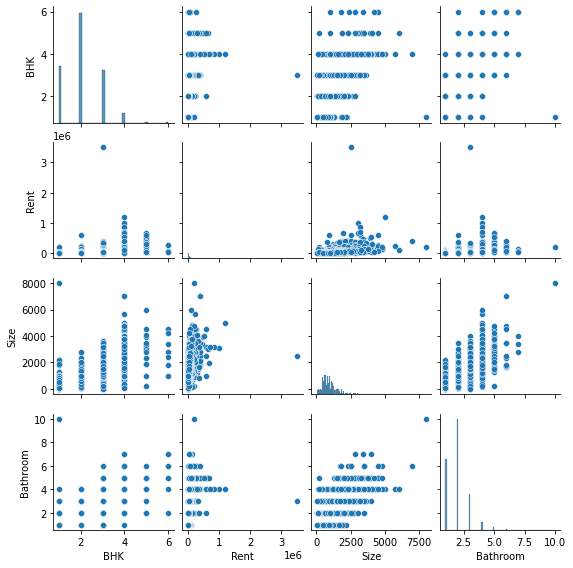

In [18]:
sns.pairplot(rent_data,height=2)
plt.show()

## Univariate Analysis

### Rent (Our Target Variable)

In [19]:
fig = px.histogram(rent_data,x='Rent',color_discrete_sequence = px.colors.qualitative.Set3, title="Rent Prices Distribution Histogram")
fig.show()
fig = px.box(rent_data, x="Rent", title='Boxplot for Rent Prices')
fig.show()

#### Observations:
- There is one outlier so far out of the inter-quantile range.

#### Actions:
- To remove outlier, as it may affect our assumptions about other variables and analysis

### Checking the position of Outlier

In [20]:
outlier = np.where(rent_data['Rent']>2000000)[0]
print(outlier)

[1837]


#### Observations:
- Outlier's position is at 1837th position in a dataframe.

### Deleting the Outlier

In [21]:
rent_data.drop(outlier, axis=0, inplace=True)

fig = px.box(rent_data, x="Rent",title='Boxplot for Rent Prices')
fig.show()

## Size

In [22]:
fig = px.histogram(rent_data, x="Size", title='Size Distribution')
fig.show()
fig = px.box(rent_data, x="Size", title='Boxplot for Size')
fig.show()

#### Observations:
- The smallest house rented has size of about 10 sq. feet.
- The biggest house rented has size of about 8000 sq. feet.
- The median of house rented has size of about 850 sq. feet.

## Floor number

In [23]:
fig = px.histogram(rent_data, x="Floor_Number", title='Floor_Number Distribution')
fig.show()
fig = px.box(rent_data, x="Floor_Number", title='Boxplot for Floor_Number')
fig.show()

## Analysis numerical columns

In [24]:
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509','#fab1f3','#86f7d7']

In [25]:
def analysis_numerical_column(col_name):
    print(rent_data[col_name].value_counts())
    
    sns.set_style('whitegrid')
    fig,axes = plt.subplots(figsize=(12,8))
    

    ax = sns.countplot(x=col_name,data=rent_data, palette=colors)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Frequency of different number of {col_name}s present in Houses available for Rent',fontsize=15)
    plt.show()

    fig = px.pie(rent_data, names=col_name, height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title=f'Pie Chart for different number of {col_name}s present in Houses available for Rent')
    fig.update_traces(textfont_size=15)
    fig.show()

### BHK

2    2265
1    1167
3    1097
4     189
5      19
6       8
Name: BHK, dtype: int64


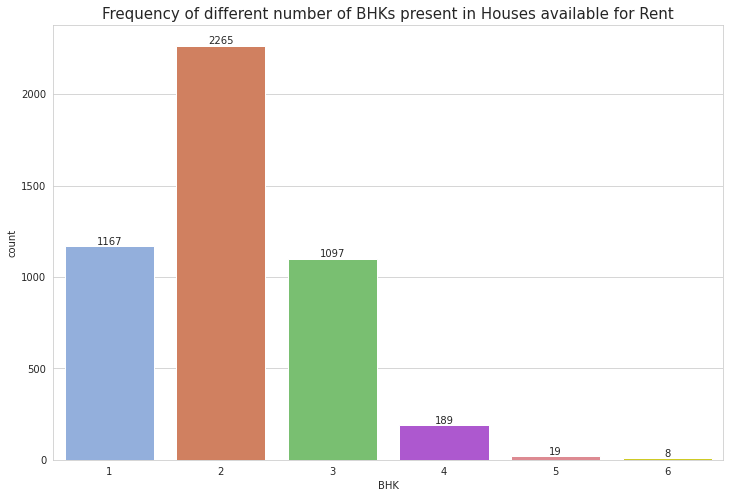

In [26]:
analysis_numerical_column('BHK')

#### Observations:
- Mostly 2 BHK house are rented the most, as it is mostly under budget for the people and can be rented soon.
- 5 and 6 BHK house are put less for rent, because there is very less demand for such big spacious houses in India. 

### Bathroom

2     2291
1     1474
3      748
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64


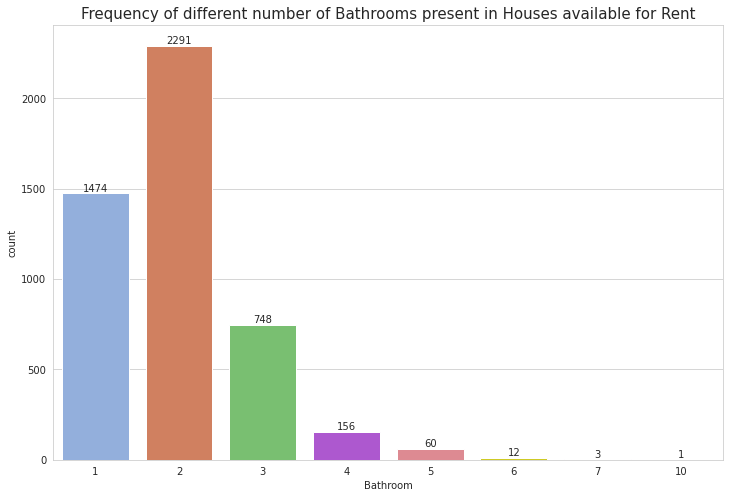

In [27]:
analysis_numerical_column('Bathroom')

#### Observations:
- House with 2 Bathrooms are most common for the houses put up on rent.
- Houses with 7 and 10 bathroom quite seems inappropriate and not much of use.

### City

Mumbai       972
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64


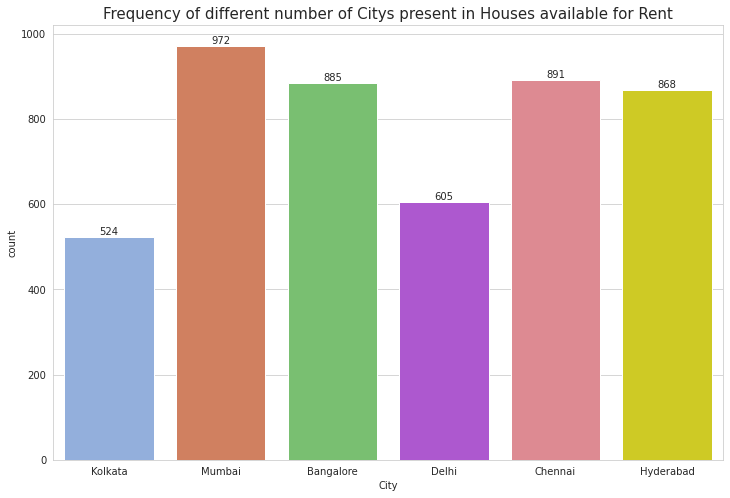

In [28]:
analysis_numerical_column('City')

#### Observations:
- Mumbai, followed by Chennai and Hyderad has most number of rented houses, seems like there is very high demand considering the job corporates and other factors.

### Area Type

Super Area     2446
Carpet Area    2297
Built Area        2
Name: Area Type, dtype: int64


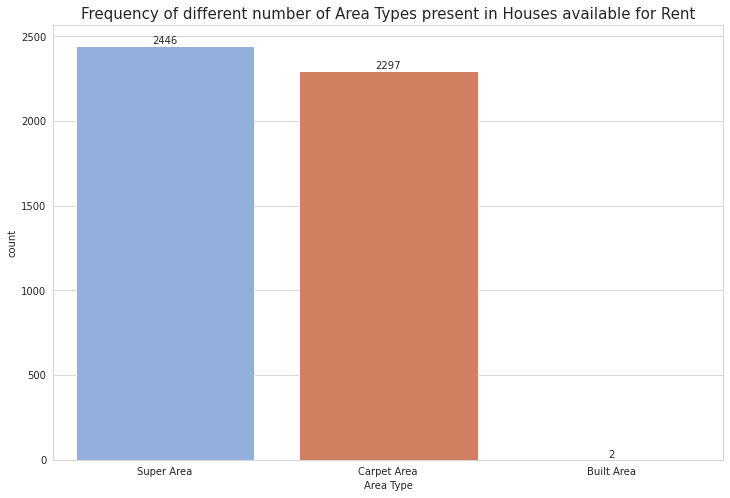

In [29]:
analysis_numerical_column('Area Type')

#### Observations:
- Super area houses are more put up on rent.
- Built Area wise rented houses are very less.

### Point of Contact

Contact Owner      3216
Contact Agent      1528
Contact Builder       1
Name: Point of Contact, dtype: int64


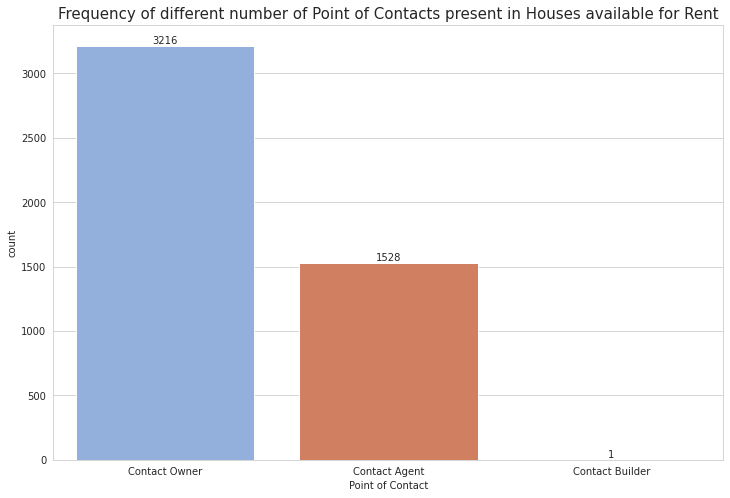

In [30]:
analysis_numerical_column('Point of Contact')

#### Observations:
- Contact wise most have put the contact of owner only, as it directly more helps with negotiation and verification.

### Tenant Preferred

Bachelors/Family    3444
Bachelors            829
Family               472
Name: Tenant Preferred, dtype: int64


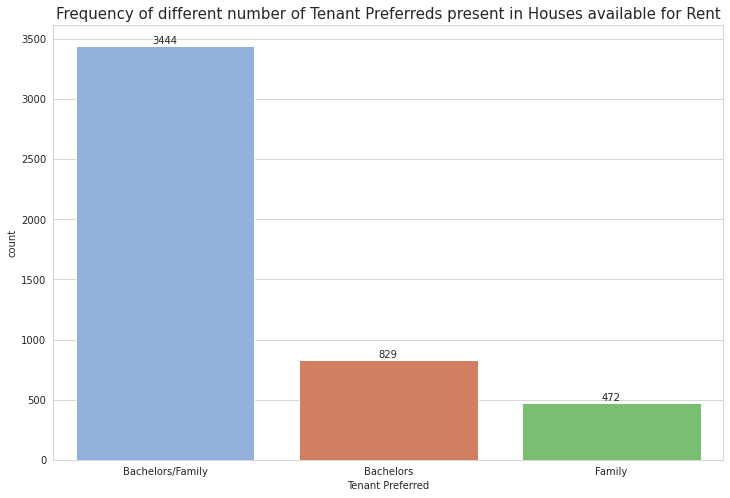

In [31]:
analysis_numerical_column('Tenant Preferred')

#### Observations:
- It seems most rented houses have no special category. They are okay with both Bachelors and Family.

### Furnishing Status

Semi-Furnished    2250
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64


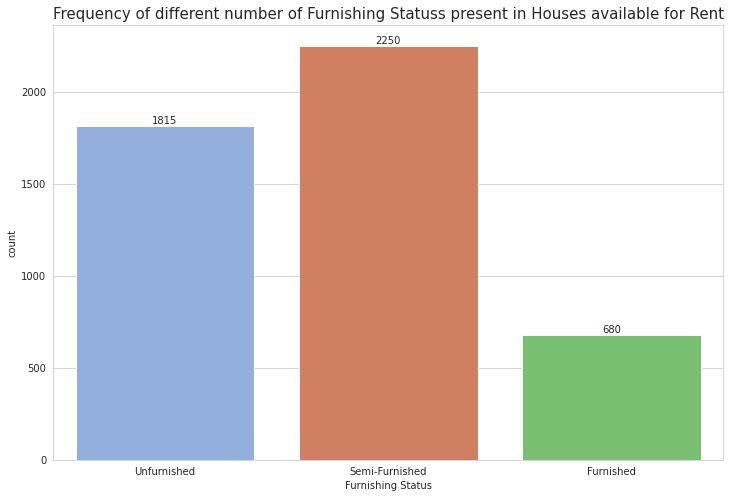

In [32]:
analysis_numerical_column('Furnishing Status')

#### Observations:
- Most Rented Houses are semi-furnished.
- Also cost wise these houses will be quite good to stay and pocket friendly.

## Bivariate Analysis

### BHK and Rent distribution

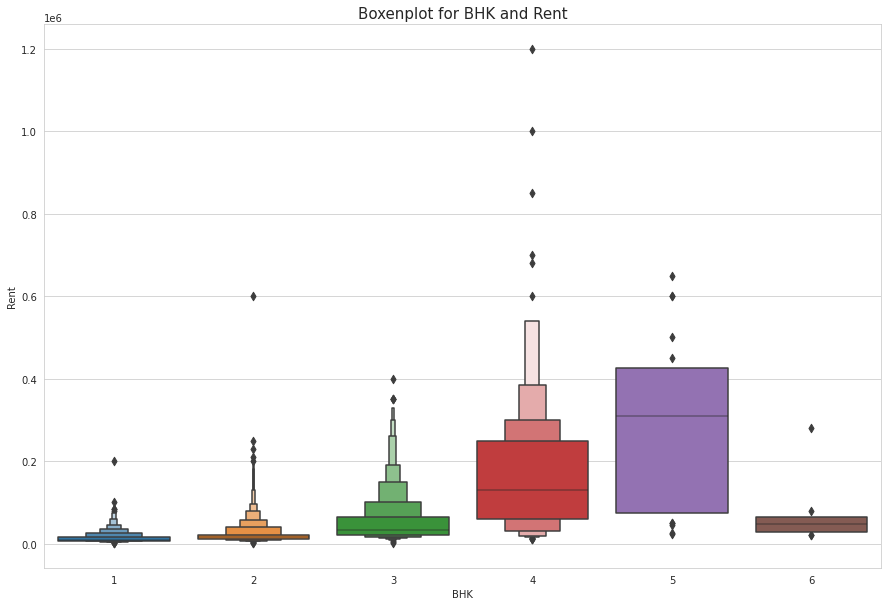

In [33]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="BHK", y='Rent',data=rent_data)
plt.title('Boxenplot for BHK and Rent',fontsize=15)
plt.show()

#### Observations:
- The rent of the houses is subsequently increasing with increase in BHK.
- For 6 BHK, things doesn't seem feasible and they are less in demand so rent is very less.

### Bathroom and Rent distribution

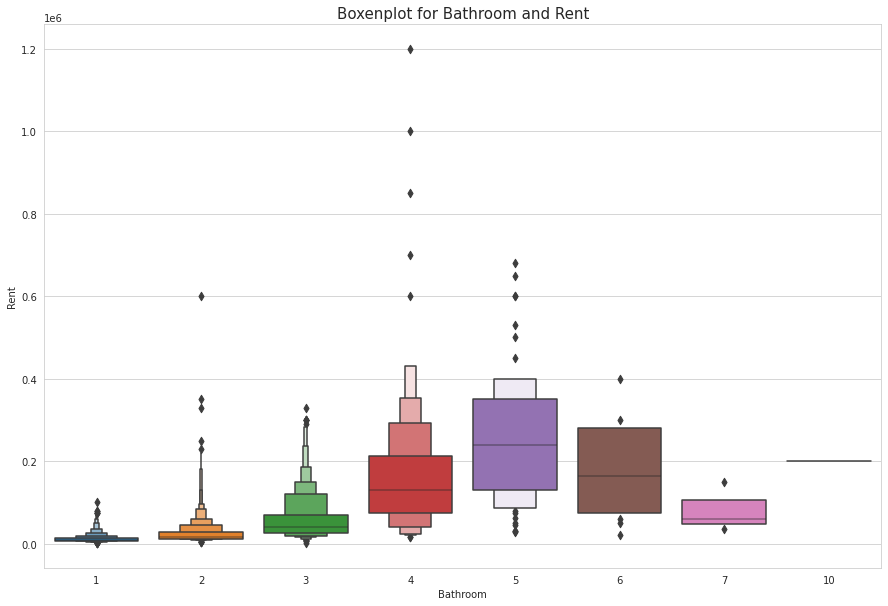

In [34]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Bathroom", y='Rent',data=rent_data)
plt.title('Boxenplot for Bathroom and Rent',fontsize=15)
plt.show()

#### Observations:
- The House rent is increasing with increase in bathrooms in house.
- But having more than 4-5 bathrooms in a house doesn't seem good or feasible, so they are less in demand and that's why there rent is less.

### Area Type and Rent Distribution

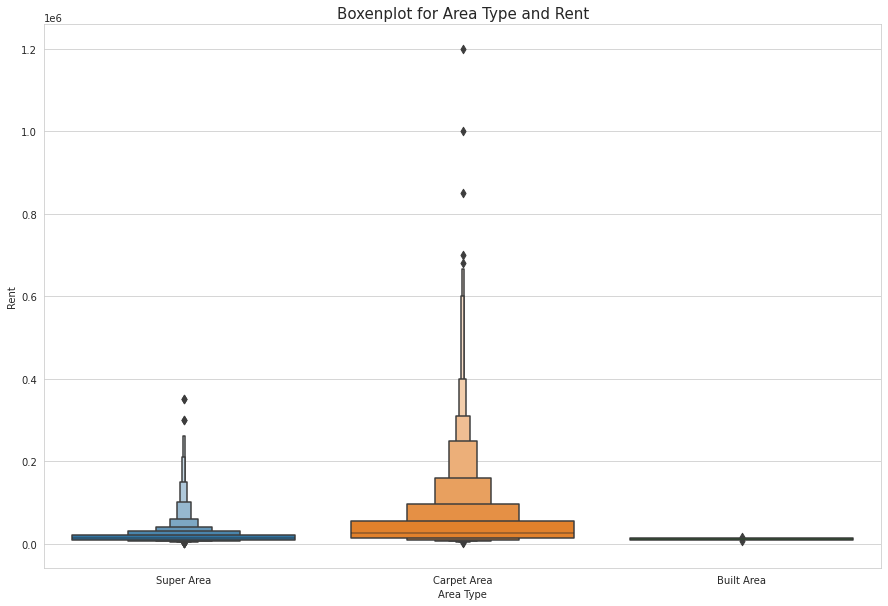

In [35]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Area Type", y='Rent',data=rent_data)
plt.title('Boxenplot for Area Type and Rent',fontsize=15)
plt.show()

#### Observations:
- Houses with Carpet Area have more rent as compared to Super Area.
- Built Area are less in demand , so rent is kept less.

### City and Rent Distribution

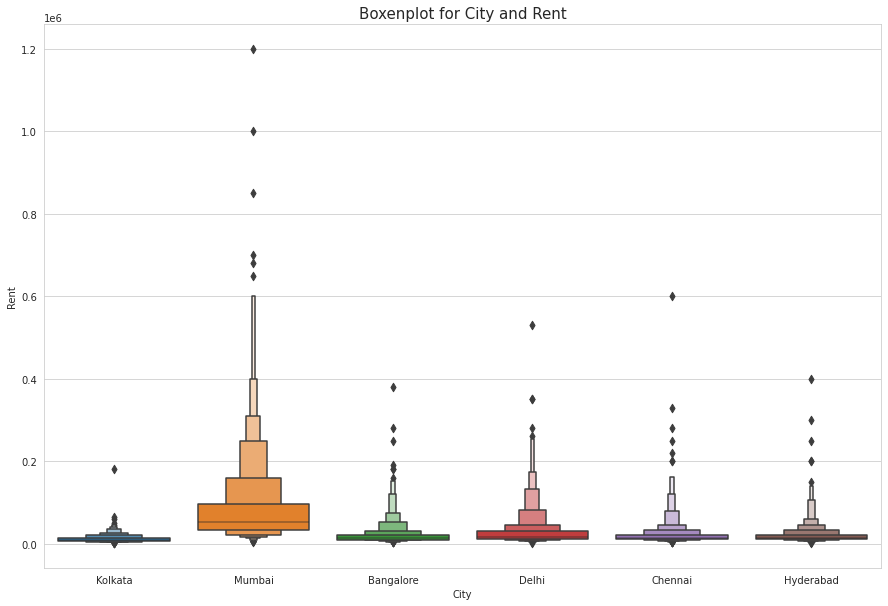

In [36]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="City", y='Rent',data=rent_data)
plt.title('Boxenplot for City and Rent',fontsize=15)
plt.show()

#### Observations:
- Seems Mumbai is having too much demand for houses, so rent is also very high. The immigrations of job corporates to Mumbai is high. This could be one of the reason of more demand in rented houses.
- All other cities except Kolkata are having fair equal amount of rent. 
- Kolkata is not very much flourised in terms of job sectors and lifestyle as compared to other cities. Moreover it is also less developed compared to them. So demand is less there, so rent is also less.

### Furnishing Status and Rent Distribution

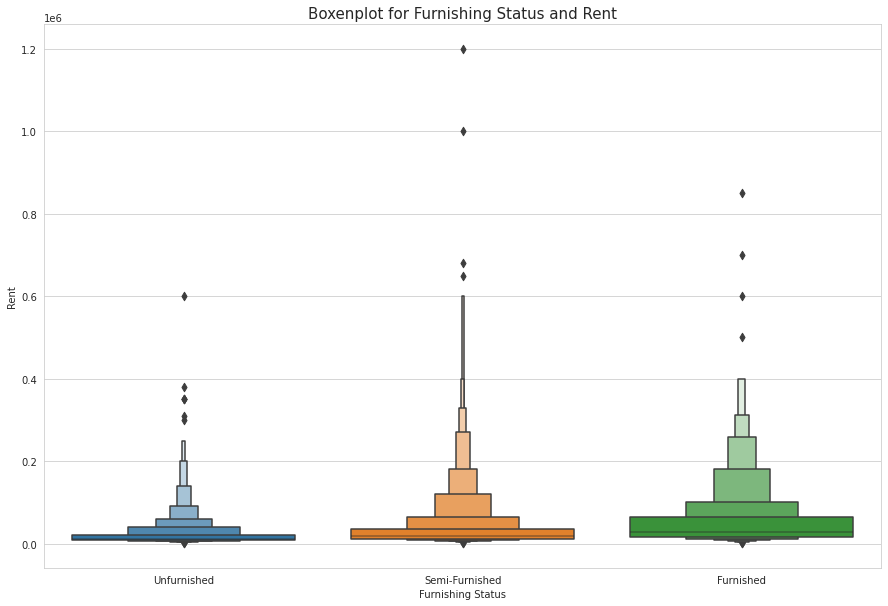

In [37]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Furnishing Status", y='Rent',data=rent_data)
plt.title('Boxenplot for Furnishing Status and Rent',fontsize=15)
plt.show()

#### Observations:
- Unfurnished houses for rent are having less rent as compared to others.

### Tenant Preferred and Rent Distribution

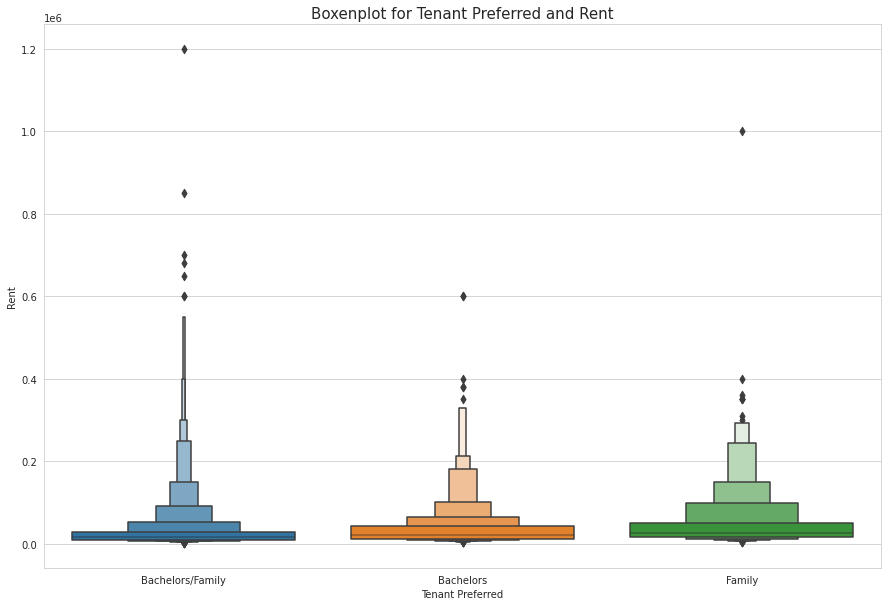

In [38]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Tenant Preferred", y='Rent',data=rent_data)
plt.title('Boxenplot for Tenant Preferred and Rent',fontsize=15)
plt.show()

#### Observations:
- Houses rented with no tenant conditions are having a bit more rent as compared to others.

### Point of Contact and Rent Distribution

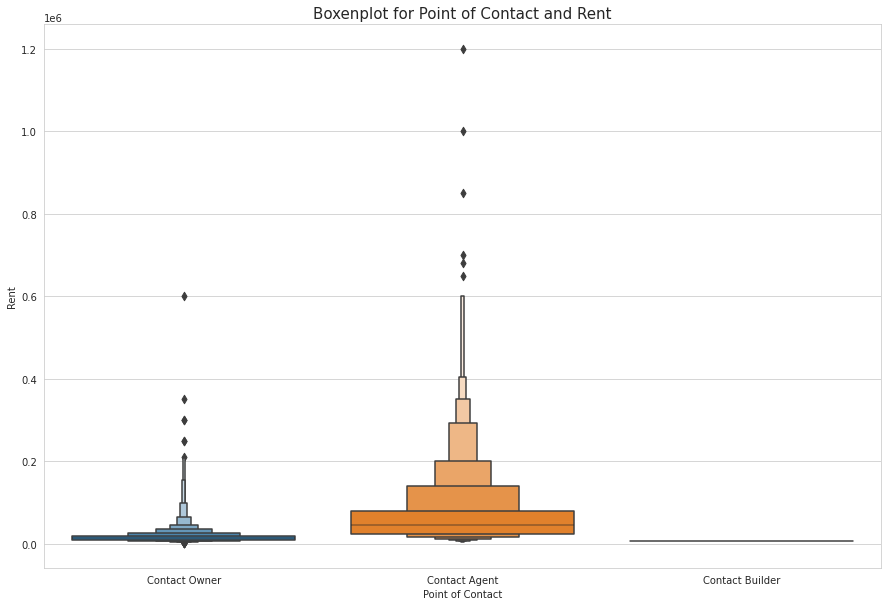

In [39]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Point of Contact", y='Rent',data=rent_data)
plt.title('Boxenplot for Point of Contact and Rent',fontsize=15)
plt.show()

#### Observations:
- As having a contact agent to get you a house rented also involves paying him/her. So this could be one of the reason that rent for Contact Agent pount of contact is bit high to compensate that.
- Directly contacting Builder involves less rent.

### Heatmap of Correlation

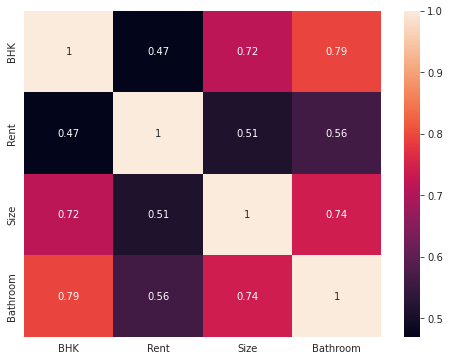

In [40]:
corr = rent_data.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr, vmax = 1,square = False,annot=True)
plt.show()

In [41]:
rent_data = pd.get_dummies(rent_data, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
rent_data.head()

,BHK,Rent,Size,Bathroom,Floor_Number,Total_Number_of_Floor,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,2,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,1,3,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,1,3,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,1,2,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,1,2,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1


<h1 style="padding:8px;background-color:#234bcf;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">Modeling</h1>

In [42]:
X = rent_data.drop('Rent',axis=1)
y = rent_data['Rent']

## Splitting into Train and Test dataset

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

## Scaling the data

In [44]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [45]:
X_test.shape

(949, 23)

## Linear Regression

In [46]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

# Evaluation metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

In [47]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 6747809661.649864
MSE: 7.1809909448157856e+19
RMSE: 8474072778.077721


## Decision Tree

In [48]:
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

# Evaluation metrics
mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
mse_dt =  metrics.mean_squared_error(y_test, dt_prediction)
rmse_dt =  np.sqrt(mse_dt)

In [49]:
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 0.26783246101941555
MSE: 0.7294732631258591
RMSE: 0.85409206946667


## SVR

In [50]:
svr = SVR()
svr.fit(X_train, y_train) 
svr_prediction = svr.predict(X_test)

# Evaluation metrics
mae_svr = metrics.mean_absolute_error(y_test, svr_prediction)
mse_svr =  metrics.mean_squared_error(y_test, svr_prediction)
rmse_svr =  np.sqrt(mse_svr)

In [51]:
print('MAE:', mae_svr)
print('MSE:', mse_svr)
print('RMSE:', rmse_svr)

MAE: 0.1863501836634358
MSE: 0.3630827123594034
RMSE: 0.6025634508990763


## Random Forest

In [52]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Evaluation metrics
mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
mse_rf =  metrics.mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)

In [53]:
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)

MAE: 0.19862591088081397
MSE: 0.31124833494084947
RMSE: 0.5578963478468464
